# Preamble

Load necessary packages and the lab data

In [36]:
from matplotlib import pyplot as plt
import numpy
import scipy
import pickle
from IPython.display import Markdown
import pandas as pd
import scipy.stats

with open('Lab1.pkl', 'rb') as f:
    drug_use, my_pi, sample_space, sample_probabilities, event_1, event_2, event_3, event_4 = pickle.load(f)

# The following are helper functions to facilitate printing outputs in the lab without interfering with the autograder. Don't concern yourself with those functions, but keep them in your submission.
def safe_print_err(e, locals=locals(), globals=globals()):
    locals = locals or {}
    globals = globals or {}
    __problem = eval('__problem', locals, globals)
    err_msg = str(e)
    if type(e) in (NameError, KeyError):
        var_name_split = str(e).split("'")
        if len(var_name_split) > 1:
            var_name = var_name_split[1]
            err_msg = f"'{var_name}' is not defined."

    display(Markdown(f"<div class='alert alert-block alert-danger'><b>Error in problem {__problem}</b>: {err_msg}</div>"))

def print_mk(msg):
    display(Markdown(msg))

# Problem 1

In this problem, we are going to work with an example probability space.

In the the file **Lab1.pkl**, you are given a sample space `sample_space` and the corresponding probabilities of each outcome in the sample space in the variable `sample_probabilities` (probability mass function).

## (a) Probability Space

Write code to create a bar plot of the probability mass function (outcomes on the **X** axis, and the probability masses on the **Y** axis). Remember to label the axes and title the figure.

Complete the following code snippet with your answer:

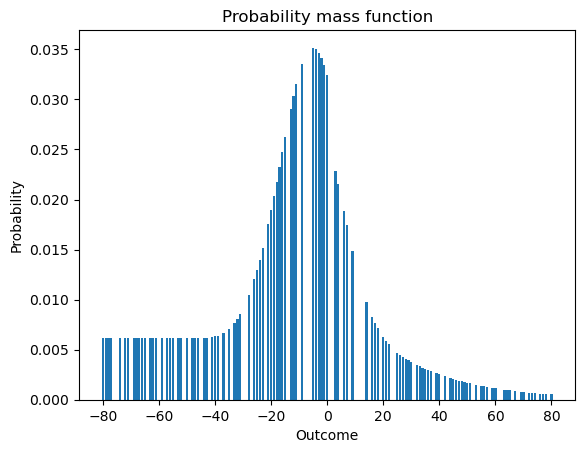

In [37]:
p1a_figure = plt.bar(sample_space,sample_probabilities)

plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.title("Probability mass function");
# Your solution goes here

Run the following cell to print the outcomes of your code.

In [38]:
__problem = '1a'

p1a_nr_children = len(p1a_figure.get_children())
if p1a_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 1(a)")
else:
    print_mk(f"p1a_figure has ${p1a_nr_children}$ children")

p1a_figure has $125$ children

---

## (b) Basic Probability Arithmetic

In the the file **Lab1.pkl**, you are given 4 events in the variables named `event_1, ..., event_4` represented as arrays (each variable represents a single event).

Using the same probability space, write code to calculate the probabilities of events `event_1, ..., event_4` and store the values in the variables `p1b_prob_1, ..., p1b_prob_4`, respectively.

Hint: the function `numpy.isin()` may be helpful.

Replace the following code snippet with your answer:

In [39]:
# Your solution goes here
def get_event_prob(event, sample_space=sample_space, sample_probabilities=sample_probabilities):
    index = numpy.isin(sample_space,event)
    probabilities = sample_probabilities[index]
    prob_sum = probabilities.sum()
    return prob_sum

p1b_prob_1 = get_event_prob(event_1)
p1b_prob_2 = get_event_prob(event_2)
p1b_prob_3 = get_event_prob(event_3)
p1b_prob_4 = get_event_prob(event_4)

Run the following cell to print the outcomes of your code.

In [40]:
__problem = '1b'

try:
    print_mk(f'$P(E_1)= {p1b_prob_1:0.4f}$')
    print_mk(f'$P(E_2)= {p1b_prob_2:0.4f}$')
    print_mk(f'$P(E_3)= {p1b_prob_3:0.4f}$')
    print_mk(f'$P(E_4)= {p1b_prob_4:0.4f}$')
except Exception as e:
    safe_print_err(e)

$P(E_1)= 0.0397$

$P(E_2)= 0.0300$

$P(E_3)= 0.0498$

$P(E_4)= 0.0288$

---

## (c) Disjoint Events

In lecture, we introduced the following definition of disjoint events.<br>
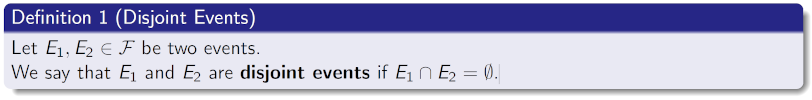

This definition is sufficient for our purposes in the course, but more generally, two events  and  can be disjoint even when their intersection is not an empty set.

The more general definition of disjoint events is as follows:

***Definition 1 amended (Disjoint Events; General)***
> Let $(\Omega, \mathcal{F}, \mathcal{P})$ be a probability space with sample space $\Omega$, event space $\mathcal{F}$ and probability measure $\mathcal{P}$. Let $E_1, E_2$ be two events.
We say that $E_1$ and $E_2$ are disjoint events if $P(E_1 \cap E_2) = 0$.

Write code to check which pair of events `event_1, ..., event_4` are disjoint, **using the amended and more general definition** of disjoint events introduced in the lab (i.e., ***Definition 1 amended (Disjoint Events; General)*** and not ***Definition 1***).

In the following variables, store the *Boolean* values: `True` if events are disjoint and `False` otherwise:
- `p1c_e_1_2_disjoint`: for events 1 and 2.
- `p1c_e_1_3_disjoint`: for events 1 and 3.
- `p1c_e_1_4_disjoint`: for events 1 and 4.
- `p1c_e_2_3_disjoint`: for events 2 and 3.
- `p1c_e_2_4_disjoint`: for events 2 and 4.
- `p1c_e_3_4_disjoint`: for events 3 and 4.

Hint: the function `numpy.intersect1d()` may be helpful.

Replace the following code snippet with your answer:

In [41]:
# Your solution goes here
def intersect_event(event_1, event_2):
  index = numpy.isin(event_1,event_2)
  event = event_1[index]
  return event

p1c_e_1_2_disjoint = get_event_prob(intersect_event(event_1,event_2)) == 0
p1c_e_1_3_disjoint = get_event_prob(intersect_event(event_1,event_3)) == 0
p1c_e_1_4_disjoint = get_event_prob(intersect_event(event_1,event_4)) == 0
p1c_e_2_3_disjoint = get_event_prob(intersect_event(event_2,event_3)) == 0
p1c_e_2_4_disjoint = get_event_prob(intersect_event(event_2,event_4)) == 0
p1c_e_3_4_disjoint = get_event_prob(intersect_event(event_3,event_4)) == 0

Run the following cell to print the outcomes of your code.

In [42]:
__problem = '1c'


try:
    print_mk(r"Events 1 and 2 are {}".format('disjoint' if p1c_e_1_2_disjoint else '**not** disjoint'))
    print_mk(r"Events 1 and 3 are {}".format('disjoint' if p1c_e_1_3_disjoint else '**not** disjoint'))
    print_mk(r"Events 1 and 4 are {}".format('disjoint' if p1c_e_1_4_disjoint else '**not** disjoint'))
    print_mk(r"Events 2 and 3 are {}".format('disjoint' if p1c_e_2_3_disjoint else '**not** disjoint'))
    print_mk(r"Events 2 and 4 are {}".format('disjoint' if p1c_e_2_4_disjoint else '**not** disjoint'))
    print_mk(r"Events 3 and 4 are {}".format('disjoint' if p1c_e_3_4_disjoint else '**not** disjoint'))
except Exception as e:
    safe_print_err(e)

Events 1 and 2 are **not** disjoint

Events 1 and 3 are **not** disjoint

Events 1 and 4 are **not** disjoint

Events 2 and 3 are **not** disjoint

Events 2 and 4 are **not** disjoint

Events 3 and 4 are disjoint

---

## (d) Conditional Probability

Using the same probability space, write code to calculate the conditional probability of `event_1` given `event_2`.

Store the result in the variable `p1d_conditional_probability_1_g_2`.

Replace the following code snippet with your answer:

In [43]:
# Your solution goes here

def conditional_prob(event_1,event_2,sample_space=sample_space,sample_probabilities=sample_probabilities):
    event_intersected = intersect_event(event_1,event_2)
    numerator = get_event_prob(event_intersected)
    denumerator = get_event_prob(event_2)
    return numerator/denumerator

p1d_conditional_probability_1_g_2 = conditional_prob(event_1,event_2)

Run the following cell to print the outcomes of your code.

In [44]:
__problem = '1d'

try:
    print_mk(f"$P(E_1 | E_2) = {p1d_conditional_probability_1_g_2:0.4f}$")
except Exception as e:
    safe_print_err(e)

$P(E_1 | E_2) = 0.0240$

---

## (e) Bayes' Law

Using the same probability space, write code to calculate the probability of `event_2` given `event_1` both directly (using the definition) and using Bayes' law, and compare the results.

Store the results of your calculation in the following variables:
- `p1e_conditional_probability_2_g_1_direct`: For direct calculation
- `p1e_conditional_probability_2_g_1_bayes`: For Bayes' law calculation

Replace the following code snippet with your answer:

In [45]:
# Your solution goes here
p1e_conditional_probability_2_g_1_direct = (
    conditional_prob(event_2,event_1,sample_space=sample_space,sample_probabilities=sample_probabilities)
)

def bayes_prob(event_1,event_2, sample_space = sample_space, sample_probabilities = sample_probabilities):
    """
    Event 1 conditioned on event 2
    """
    cond_prob = conditional_prob(event_2,event_1)
    numerator = cond_prob * get_event_prob(event_1)
    denumerator = get_event_prob(event_2)
    return numerator / denumerator

p1e_conditional_probability_2_g_1_bayes = (
    bayes_prob(event_2,event_1)
)

Run the following cell to print the outcomes of your code.

In [46]:
__problem = '1e'

try:
    print_mk(f"""| Method | $P(E_1 | E_2)$ |
| :- | :-: |
| Direct Calculation | ${p1e_conditional_probability_2_g_1_direct:0.4f}$ |
| Bayes' Law Calculation | ${p1e_conditional_probability_2_g_1_bayes:0.4f}$ |""")
except Exception as e:
    safe_print_err(e)

| Method | $P(E_1 | E_2)$ |
| :- | :-: |
| Direct Calculation | $0.0181$ |
| Bayes' Law Calculation | $0.0181$ |

---

## (f) Expected Value

Using the same probability space, write code to calculate the expected value of the random variable $X$ that is defined as the outcome of the experiment defined by `sample_space` and `sample_probabilities`.

Store the result of your calculation in the variable `p1f_expected_value`.

Replace the following code snippet with your answer:

In [47]:
# Your solution goes here
def get_expected_val(sample, sample_prob = sample_probabilities):
  return numpy.sum(sample_probabilities*sample_space)

p1f_expected_value = numpy.sum(sample_probabilities*sample_space)

Run the following cell to print the outcomes of your code.

In [48]:
__problem = '1f'

try:
    print_mk(f"$\\mathbb{{E}}[X] = {p1f_expected_value:0.4f}$")
except Exception as e:
    safe_print_err(e)

$\mathbb{E}[X] = -13.5347$

---

## (g) Standard Deviation

Using the same probability space, write code to calculate the standard deviation of the random variable $X$ that is defined as the outcome of the experiment defined by `sample_space` and `sample_probabilities`.

Store the result of your calculation in the variable `p1g_standard_dev`.

Replace the following code snippet with your answer:

In [49]:
# Your solution goes here
def get_std(sample = sample_space):
    exp_val = get_expected_val(sample)
    error_sqrt = (sample-exp_val)**2
    variance = numpy.sum(error_sqrt*sample_probabilities)
    std = numpy.sqrt(variance)
    return std

p1g_standard_dev = get_std()

Run the following cell to print the outcomes of your code.

In [50]:
__problem = '1g'

try:
    print_mk(f"$S.D.(X) = {p1g_standard_dev:0.4f}$")
except Exception as e:
    safe_print_err(e)

$S.D.(X) = 28.7157$

---

## (h) Entropy

Using the same probability space, write code to calculate the entropy of the random variable $X$ that is defined as the outcome of the experiment defined by `sample_space` and `sample_probabilities`. Use log base 2 for the calculation.

Note that although $log(0)$ is undefined, for the purposes of entropy, we consider $0 \cdot log(0)=0$.

Store the result of your calculation in the variable `p1h_entropy_x`.

Replace the following code snippet with your answer:

In [51]:
# Your solution goes her

def entropy(prob_sample):
    """
    Replacing 0 with 1 since log(1) = 0, log(0) is undefined
    """
    mod_sample_prob = numpy.copy(prob_sample)
    mod_sample_prob[mod_sample_prob == 0] = 1

    entropy = -numpy.sum(numpy.log2(mod_sample_prob) * mod_sample_prob)
    return entropy

p1h_entropy_x = entropy(sample_probabilities)

Run the following cell to print the outcomes of your code.

In [52]:
__problem = '1h'

try:
    print_mk(f"$H(X) = {p1h_entropy_x:0.4f}$")
except Exception as e:
    safe_print_err(e)

$H(X) = 6.1266$

---

# Problem 2

In this problem, we will study the Randomized Response privacy mechanism.

## (a) How Many Yeses?
Before we work with the data, let us first understand how the number of yes answers to the spinner question changes the maximum likelihood estimate of the true percentage of the population belonging to group A.

Write code that plots the maximum likelihood estimate for the true percentage of the population belonging to group A ($\hat{\pi}$) as a function of the percentage of respondendents answering yes to the spinner question ($\frac{n_1}{n}$). The $X$ axis values should range from $0$ to $1$.

On one figure, create different plots with the values $p=0,0.1,0.2,0.3$ and $0.4$.

On a second figure, create similar plots with the values $p=0.6,0.7,0.8,0.9$ and $1$.

Finally, limit the $Y$ axes in both figures to the range $0-1$.

Don't forget to label the axes, title the plots and provide legends.

Complete the following code snippet with your answer:

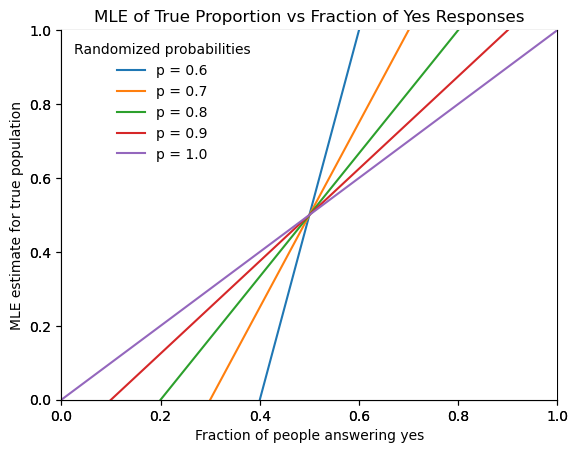

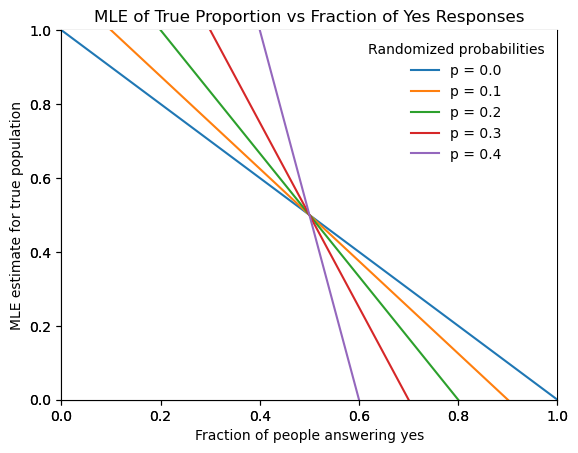

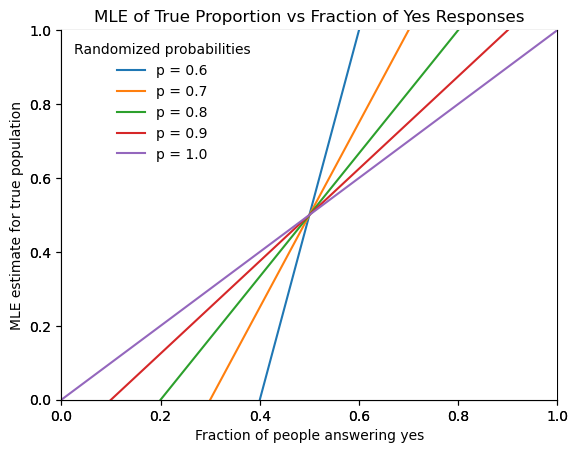

In [53]:
def get_mle(true_prob,p):
    func = (true_prob-(1-p))/(2*p-1)
    return func
def plot_lines(probabilities, fig):
    exp_prob = numpy.linspace(0,1,num = 100)
    ax = fig.add_subplot()

    ax = fig.add_subplot(111)
    exp_prob = numpy.linspace(0, 1, num=100)

    for p in probabilities:
        mle_est = get_mle(exp_prob, p)
        ax.plot(exp_prob, mle_est, label=f"p = {p}")

    # Customize the axes
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Fraction of people answering yes")
    ax.set_ylabel("MLE estimate for true population")
    ax.set_title("MLE of True Proportion vs Fraction of Yes Responses")
    ax.legend(frameon=False, title="Randomized probabilities")

    return fig

p2a_figure_1 = plt.figure()
# Your solution goes here for p=0-0.4
p1 = numpy.array([0,0.1,0.2,0.3,0.4])
plot_lines(p1,p2a_figure_1)

p2a_figure_2 = plt.figure()
# Your solution goes here for p=0.6-1
p2 = numpy.array([0.6,0.7,0.8,0.9,1])
plot_lines(p2,p2a_figure_2)

Run the following cell to print the outcomes of your code.

In [54]:
__problem = '2a'

p2a_nr_children_1 = len(p2a_figure_1.get_children())
p2a_nr_children_2 = len(p2a_figure_2.get_children())
if p2a_nr_children_1 <= 1 or p2a_nr_children_2 <= 1:
    safe_print_err("Missing/incomplete answer to 2(a)")
else:
    print_mk(f"p2a_figure_1 has ${p2a_nr_children_1}$ children")
    print_mk(f"p2a_figure_2 has ${p2a_nr_children_2}$ children")

p2a_figure_1 has $3$ children

p2a_figure_2 has $3$ children

---

## (b) Total Number of Respondents

We will now study the effect of the number of respondents  on the standard deviation of the maximum likelihood estimate of the percentage of the population belonging to group A ($s.d.(\hat{\pi})$).

Write code that plots the standard deviation of the maximum likelihood estimate for the true percentage of the population belonging to group A ($s.d.(\hat{\pi})$) as a function of the number of respondendents $n$. The $X$ axis values should range from $10$ to $5000$.

You may use the value $\pi=0.5$ (true percentage of the population belonging to group A).

On one figure, create different plots with the values $p=0,0.1,0.2,0.3$ and $0.4$.

On a second figure, create similar plots with the values $p=0.6,0.7,0.8,0.9$ and $1$.

Don't forget to label the axes, title the plots and provide legends.

Complete the following code snippet with your answer:

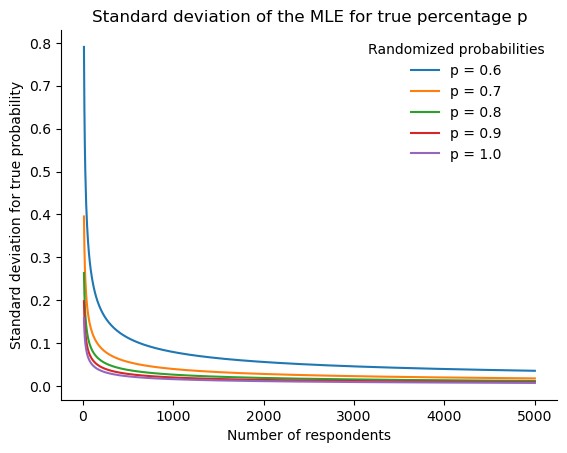

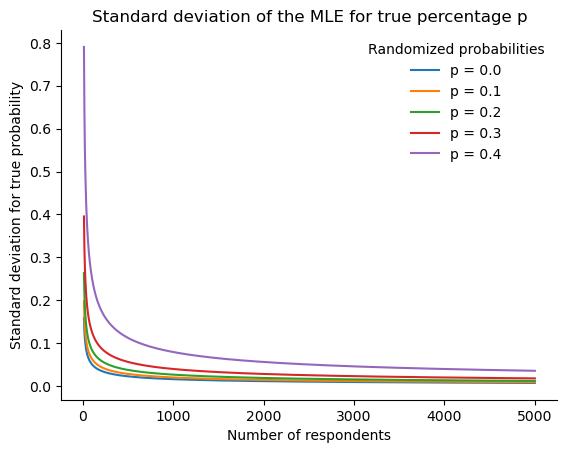

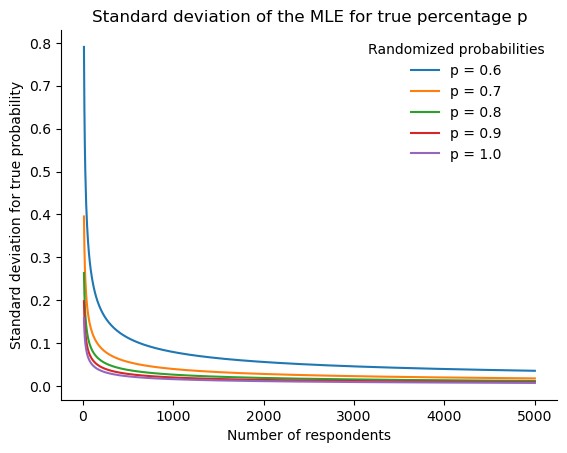

In [55]:
def mle_var(true_prob, p,n):
    #return 0.5 / (numpy.abs(2 * p - 1) * numpy.sqrt(n))
    func = (1/(16*(p-0.5)**2)-1/4+true_prob*(1-true_prob))/n
    return func

def plot_lines(probabilities, tp,n,fig):
    ax = fig.add_subplot(111)
    n = numpy.linspace(10,5000,1000)

    for p in probabilities:
        std_mle = numpy.sqrt(mle_var(tp,p,n))
        ax.plot(n,std_mle, label = f"p = {p}")

    # Customize the axes
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_xlabel("Number of respondents")
    ax.set_ylabel("Standard deviation for true probability")
    ax.set_title("Standard deviation of the MLE for true percentage p")
    ax.legend(frameon=False, title="Randomized probabilities")

    return fig


n = numpy.linspace(10,5000,1000)
tp = 0.5

p2b_figure_1 = plt.figure()
# Your solution goes here for p=0-0.4
p1 = numpy.array([0,0.1,0.2,0.3,0.4])
plot_lines(p1,tp,n,p2b_figure_1)

p2b_figure_2 = plt.figure()
# Your solution goes here for p=0.6-1
p2 = numpy.array([0.6,0.7,0.8,0.9,1])
plot_lines(p2,tp,n,p2b_figure_2)

Run the following cell to print the outcomes of your code.

In [56]:
__problem = '2b'

p2b_nr_children_1 = len(p2b_figure_1.get_children())
p2b_nr_children_2 = len(p2b_figure_2.get_children())
if p2b_nr_children_1 <= 1 or p2b_nr_children_2 <= 1:
    safe_print_err("Missing/incomplete answer to 2(b)")
else:
    print_mk(f"p2b_figure_1 has ${p2b_nr_children_1}$ children")
    print_mk(f"p2b_figure_2 has ${p2b_nr_children_2}$ children")

p2b_figure_1 has $2$ children

p2b_figure_2 has $2$ children

### In this Markdown cell, explain your results:

***Place your answer here***

--- 

## (c) Putting p in Spinner

We will now study the effect of $p$ on the standard deviation of the maximum likelihood estimate of the percentage of the population belonding to group A ($s.d.(\hat{\pi})$).

Write code that plots the standard deviation of the maximum likelihood estimate for the true percentage of the population belonging to group A ($s.d.(\hat{\pi})$) as a function of $p$. The $X$ axis values should range from $0$ to $1$ with fine increments to see the full relationship.

Create different plots with the values $n=10,100,1000$ and $10000$ and place them on the same figure. You may use the value $\pi=0.5$ (true percentage of the population belonging to group A).

Don't forget to label the axes, title the plot and provide a legend.

Complete the following code snippet with your answer:

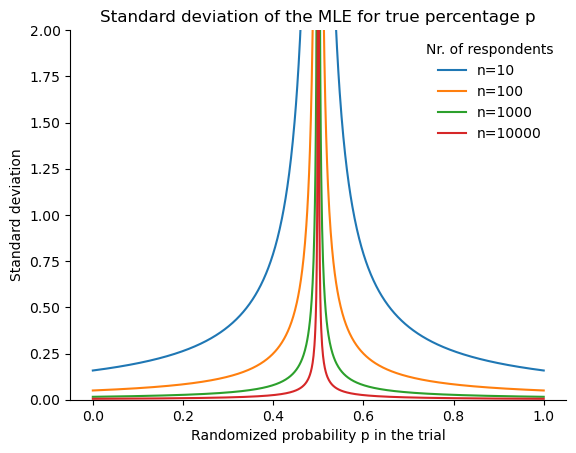

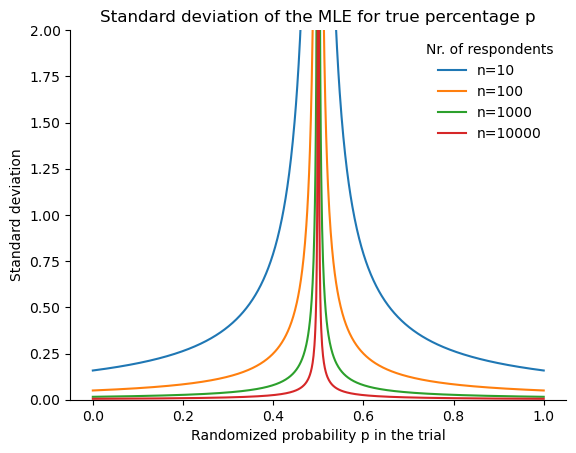

In [57]:
def mle_var(true_prob, p,n):
    #return 0.5 / (numpy.abs(2 * p - 1) * numpy.sqrt(n))
    func = (1/(16*(p-0.5)**2)-1/4+true_prob*(1-true_prob))/n
    return func

def plot_lines(p, tp,respondents,fig):
    ax = fig.add_subplot(111)
    n = numpy.linspace(10,5000,1000)

    for n in respondents:
        std_mle = numpy.sqrt(mle_var(tp,p,n))
        ax.plot(p,std_mle,label = f"n={n}")

    ax.set_ylim(0,2)

    # Customize the axes
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_xlabel("Randomized probability p in the trial")
    ax.set_ylabel("Standard deviation")
    ax.set_title("Standard deviation of the MLE for true percentage p")
    ax.legend(frameon=False, title="Nr. of respondents")

    return fig

p2c_figure = plt.figure()
# Your solution goes here
p = numpy.linspace(0,1,1000)
p[p == 0.5] = 0.499999999999
n = [10,100,1000,10000]
tp = 0.5

plot_lines(p,tp,n,p2c_figure)

Run the following cell to print the outcomes of your code.

In [58]:
__problem = '2c'

p2c_nr_children = len(p2c_figure.get_children())
if p2c_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 2(c)")
else:
    print_mk(f"p2c_figure has ${p2c_nr_children}$ children")

p2c_figure has $2$ children

### In this Markdown cell, explain your results:

***Place your answer here***

The graph shows a steady increase from both sides, p = 0 and p = 1, towards the asymptotic curve at p = 0.5. In the brakpoint at p = 0.5 the standard deviation rises towards infinity, so we have limited the y-axis from 0 to 2. The graph shows the differences in curves when the number of respondanses changes. From this curve we see that our standard deviation becomes slimmer when the number of responces increases. This is a natural conclusion from our comment in 2b).

---

**Implementing Randomized Response**

We will now use the data to simulate randomized response.

Consider the data represented in the variable `drug_use` which contains the responses to the following question: "Have you ever used cocaine, crack cocaine, heroin, or methamphetamine?"

The value `True` corresponds to "yes" while `False` corresponds to "no."

## (d) Simulate the Spinner

We will now simulate the result of the spinner for each respondent that is represented in the variable `drug_use`. In this lab, we will use the following value of:
```python
p=0.2
```

Create the following variables:
- `p2d_spinner_result_A`: This array should have the same size as the array `drug_use`. Each entry of this array should contain the *Boolean* value `True` (code for group A: used drugs) with probability $p$, and the value `False` (code for group B) with probability $1-p$.
- `p2d_nr_spinner_A`: How many times did the spinner land on "used drugs" in your simulation?
- `p2d_expected_spinner_A`: Calculate the expected number of times that the spinner would land on "used drugs" (the expected value from probability theory).

*Hint*: the call to the function `numpy.random.uniform(size=n)` generates an array of length $n$ with random values between $0$ and $1$ drawn uniformly at random.

*Hint 2*: for any $x \in [0,1]$ the probability that `numpy.random.uniform()` returns a number smaller or equal to $x$ is exactly $x$. That is, $P(\text{numpy.random.uniform()} \leq x) = x$.

Complete the following code snippet with your answer:

In [ ]:
p=0.2

# Your solution goes here

n = len(drug_use)

p2d_spinner_result_A = numpy.random.uniform(0, 1, n) < p

p2d_nr_spinner_A = p2d_spinner_result_A.sum()

p2d_expected_spinner_A = p*n

Run the following cell to print the outcomes of your code.

In [60]:
__problem = '2d'

try:
    print_mk(f"The spinner landed on 'used drugs' ${p2d_nr_spinner_A}$ times.")
    print_mk(f"The spinner is expected to land on 'used drugs' ${p2d_expected_spinner_A:0.2f}$ times.")
except Exception as e:
    safe_print_err(e)

The spinner landed on 'used drugs' $876$ times.

The spinner is expected to land on 'used drugs' $849.40$ times.

---

## (e) Yes or No?

Create the following variables:
- `p2e_rr_yes`: This array should have the same size as the array `drug_use`. Using the variables `drug_use` and `p2d_spinner_result_A` we will now generate another variable `p2e_rr_yes` that simulates the respondents' answers to the spinner question. Concretely, each entry of `p2e_rr_yes` should be `True` (corresponding to "spinner: yes") if and only if the corresponding entries of `drug_use` and `p2d_spinner_result_A` agree on their values (i.e. both are `True` or both are `False`). Whenever `drug_use` and `p2d_spinner_result_A` disagree on their values (i.e. one is `True` and the other is `False`), `p2e_rr_yes` should be assigned the value `False` (corresponding to "spinner: no").
- `p2e_nr_rr_yes`: How many subjects got a spinner result that agrees with their group?
- `p2e_expected_rr_yes`: Calculate expected number of subjects that would answer "yes" to the spinner question (the probability theory expectation). For this part, you may assume that $\pi$ is equal to `my_pi`.

Replace the following code snippet with your answer:

In [ ]:
# Your solution goes here

p2e_rr_yes = drug_use == p2d_spinner_result_A

p2e_nr_rr_yes = p2e_rr_yes.sum()

p2e_expected_rr_yes = n * (p*my_pi + (1-p) * (1-my_pi))

Run the following cell to print the outcomes of your code.

In [62]:
__problem = '2e'

try:
    print_mk(f"${p2e_nr_rr_yes}$ subjects agreed with the result of their spinner.");
    print_mk(f"The expected number of subjects answering 'yes' to the spinner question is ${p2e_expected_rr_yes:.2f}$.");
except Exception as e:
    safe_print_err(e)

$3017$ subjects agreed with the result of their spinner.

The expected number of subjects answering 'yes' to the spinner question is $2994.40$.

---

## (f) Estimate

We will now pretend we don't have direct access to the variable `drug_use`, and estimate the true proportion of the population that belongs to the group `drug_use=True` using `p2e_rr_yes`, and the value of $p$ only (using the maximum likelihood estimate from Randomized Response).

Write code that calculates the maximum likelihood estimate of the true proportion of the population that belongs to the group `drug_use=True`, using only $p$ and the variable `p2e_rr_yes`.

Store the resulting calculation in the variable `p2f_pi_hat`.

Replace the following code snippet with your answer:

In [63]:
# Your solution goes here

n1 = numpy.sum(p2e_rr_yes)
n = len(p2e_rr_yes)

p2f_pi_hat = (n1 + n*(p-1)) / (n * (2*p - 1))

Run the following cell to print the outcomes of your code.

In [64]:
__problem = '2f'

try:
    print_mk(f"The ML estimate of the percentage of drug users in the population is ${100*p2f_pi_hat:.2f}\\%$")
except Exception as e:
    safe_print_err(e)

The ML estimate of the percentage of drug users in the population is $14.94\%$

---

## (g) Validate your Estimate

We will now look at the variable `drug_use` in order to validate our maximum likelihood estiamte from the 
previous part.

Write code that uses the variable `drug_use` to calculate the direct estimate of the true percentage of drug users in the popoulation.

Hint: this one is a simple ratio.

Store the result in the variable `p2g_pi_direct_estimate`.

Replace the following code snippet with your answer:

In [65]:
# Your solution goes here
n = len(drug_use)

p2g_pi_direct_estimate = drug_use.sum() / n

Run the following cell to print the outcomes of your code.

In [66]:
__problem = '2g'

try:
    print_mk(f"The direct estimate of the percentage of drug users in the population is ${100*p2g_pi_direct_estimate:.2f}\\%$")
except Exception as e:
    safe_print_err(e)

The direct estimate of the percentage of drug users in the population is $15.82\%$

---

## (h) Empirical Distribution of ML Estimate

Each time you run the simulation from parts (d)-(f) you will potentially get a different estimate (due to the randomness in the spinner). The theory says that the distirbution of this estimate should be a Normal distribution with mean equal to the value we calculated in part (g) (we'll assume this is indeed $\pi$ for this part), and variance equal to

$$V = \frac{1}{n} \left[ \frac{1}{16(p-\frac{1}{2})^2} - \frac{1}{4} + \pi(1-\pi) \right]$$

In this part, we will validate this with empirical simulation.

Write code that repeats the simulation from parts (d)-(f) 10,000 times and stores the maximum likelihood estimate ($\hat{\pi}$) each time. Afterwards, plot a histogram of these 10,000 maximum likelihood estimates. Use $30$ bins in the bar diagram.

On top of the histogram, plot the probability density function (pdf) of the Normal distribution with mean $\pi$ and variance $V$ and see if they match (use `scipy.stats.norm.pdf()` to generate the Normal distribution pdf). Plot the Normal pdf on a second y axis.

You may limit the $X$ axis to the relevant range where the data lies, if it is more visually appealing.

Don't forget to label the axes, title the plot and provide a legend.

Complete the following code snippet with your answer:

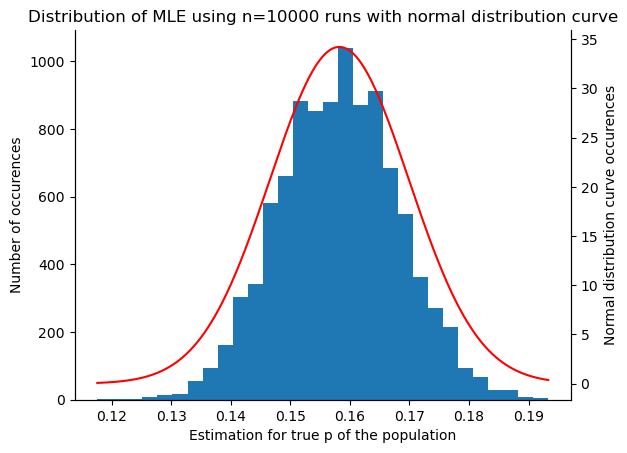

In [ ]:
p2h_figure = plt.figure()
# Your solution goes here

j = 10000

v = (1/n) * (1/(16*(p-(1/2))**2) - 1/4 + my_pi*(1-my_pi))
sd = numpy.sqrt(v)

p2h_pi_hats = numpy.zeros(j)

for i in range(j):
    p2h_spinner_result_A = numpy.random.uniform(0, 1, n) < p

    p2h_rr_yes = drug_use == p2d_spinner_result_A

    n1 = numpy.sum(p2h_rr_yes)
    p2h_pi_hat = (n1 + n*(p-1)) / (n * (2*p - 1))

    p2h_pi_hats[i] = p2h_pi_hat

ax1 = p2h_figure.add_subplot()

ax1.set_title("Distribution of MLE using n=10000 runs with normal distribution curve")

ax1.hist(p2h_pi_hats, bins=30)
ax1.spines["top"].set_visible(False)
ax1.set_ylabel("Number of occurences")
ax1.set_xlabel("Estimation for true p of the population")

x = numpy.linspace(min(p2h_pi_hats), max(p2h_pi_hats), 1000)
pdf = scipy.stats.norm.pdf(x, loc=p2g_pi_direct_estimate, scale=sd)

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='red')
ax2.spines["top"].set_visible(False)
ax2.set_ylabel("Normal distribution curve occurences")

plt.show()

Run the following cell to print the outcomes of your code.

In [68]:
__problem = '2h'

p2h_nr_children = len(p2h_figure.get_children())
if p2h_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 2(h)")
else:
    print_mk(f"p2h_figure has ${p2h_nr_children}$ children")

p2h_figure has $3$ children

### In this Markdown cell, answer the following question

Is the theory visually validated by the empirical simulation?

***Place your answer here***

Yes, the theory is visually validated by the empirical simulation, since we can see that the histogram of the MLE follows the overlaid Normal distribution curve. The variance of the empirical estimates seems to be a bit lower than the theoretical value, but overall the estimates align well with the theoretical assumption.

### Extra credit (out-of-scope, hard)

If you examine the empirical variance (of the simulated trials) you should see that it doesn't exactly match the theoretical variance $V$. Can you explain why?

***Place your answer here***


---

## (i) How Much Privacy is Provided

In this part, we will look at one aspect of protecting the privacy of the subjects by calculating the probability that we can identify a subject who used drugs in her or his life, provided that their `p2e_rr_yes` (answer to the spinner question) is `True` ("yes"). We will also calculate the likelihood we can identify a subject who used drugs in her or his life, provided that their `p2e_rr_yes` is `False` ("no"). These are equivalent to the probabilities $P(G_i = A | X_i = ``yes")$ and $P(G_i = A | X_i = ``no")$.

Concretely, write code that calculates the following variables:

- `p2i_drug_use_and_rr_yes`: The percentage of subjects that have `drug_use==True` out of the total subpopulation of subjects with `rr_yes=True`; and
- `p2i_drug_use_and_rr_no`: The percentage of subjects that have `drug_use==True` out of the total subpopulation of subjects with `rr_yes=False`.

Replace the following code snippet with your answer:

In [69]:
# Your solution goes here

p2i_drug_use_and_rr_yes = numpy.sum((drug_use == True) & (p2e_rr_yes == True)) / numpy.sum(p2e_rr_yes == True)
p2i_drug_use_and_rr_no = numpy.sum((drug_use == True) & (p2e_rr_yes == False)) / numpy.sum(p2e_rr_yes == False)

Run the following cell to print the outcomes of your code.

In [70]:
__problem = '2i'

try:
    print_mk(f"$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: yes'$) = {100*p2i_drug_use_and_rr_yes:.2f}\\%$\n")
    print_mk(f"$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: no'$) = {100*p2i_drug_use_and_rr_no:.2f}\\%$\n")
except Exception as e:
    safe_print_err(e)

$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: yes'$) = 4.77\%$


$P(G_i =$ 'drugs: yes' $| X_i =$ 'spinner: no'$) = 41.80\%$


### In this Markdown cell, answer the following question

- Interpret how these values provide assurances on protecting the privacy of individuals from being identified as drug users.
- Which spinner answer is more revealing than the other in terms of identifying the participants who used drugs (inference threat)?

***Place your answer here***

- These values show that for people answering 'spinner: yes', the chance of it being a drug user is quite low, therefore making it difficult to identify actual drug users from this group. While the chance of being an actual drug user is much higher if you answered 'spinner: no', there is still a large chance that it is not in fact a drug user. It is therefore still not possible to identify drug users with absolute certainty just based on the answers to the spinner question. The privacy of individuals is therefore protected from being identified as drug users.    
- The spinner answer 'no' would be more revealing, because it is a lot more likely to get 'drugs: no' on the spinner. Since we know data that most people have not used drugs, the majority will answer 'yes' on the spinner question. This means that when someone does answer 'no', there is a higher chance that it is a drug user that got 'no' than a non-user who got 'yes'.

---

# Problem 3

List all **individuals** and **sources** that you consulted with while working on this assignment.

***Place your answer here***

Group members
- Victoria Kolsing
- Nikolai Coop
- Edvard Soerby

Sources
- Numpy and Pyplot docs